# Nationalitäten #

Hypothese:
Die Verwendung von Nationalitäten führen zu Fehlern, weil diese als wertend interpretiert werden können.

Grund für Beschäftigung:
Quantitative Analyse

TODO: BSP

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [2]:
import csv
import requests
import datetime
import math

requestData = []
responseData = []
output = []
i = 0
stepsize = 100
maxLines = 670

countries = []
adjectives = []
nationalities = []

with open('../data/Nationalitäten.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        countries.append(row['country'])
        if row['adjektiv'] != '---':
            adjectives.append(row['adjektiv'])
        if row['nationalityM'] != '---':
            nationalities.append(row['nationalityM'])
        if row['nationalityF'] != '---':
            nationalities.append(row['nationalityF'])

In [6]:
# als Teilwort
def all(c):
    return True
def find_filter(contains):
    def f(element):
        return element['text'].lower().find(contains) > 0
    return f
def contains_adjective(element):
    for adjective in adjectives:
#         for token in element['tokens']:
#             if token.lower() == adjective.lower():
#                 return True
        if element['text'].lower().find(adjective) > 0:
            return True
    return False
def contains_country(element):
    for country in countries:
        if element['text'].lower().find(country.lower()) > 0:
            return True
    return False
def contains_nationality(element):
    for nationality in nationalities:
#         for token in element['tokens']:
#             if token.lower() == nationality.lower():
#                 return True
        if element['text'].lower().find(nationality.lower()) > 0:
            return True
    return False
def contains_adjective_without_deutsch(element):
    for adjective in adjectives:
        if element['text'].lower().find(adjective) > 0 and element['text'].lower().find('deutsch') == -1:
            return True
    return False

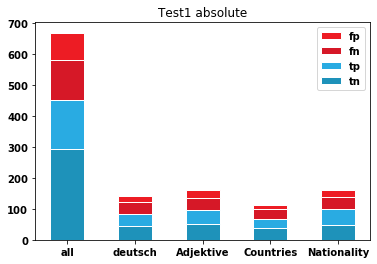

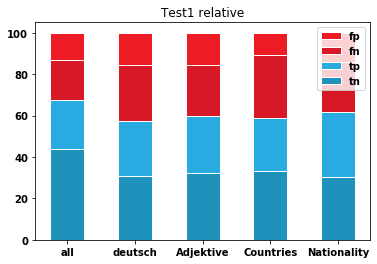

In [7]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('deutsch',find_filter('deutsch')))
diagram_filters.append(('Adjektive',contains_adjective))
diagram_filters.append(('Countries',contains_country))
diagram_filters.append(('Nationality',contains_nationality))

#name, filters, relative
create_plt(name = "Test1 absolute", filters = diagram_filters, relative = False)
create_plt(name = "Test1 relative", filters = diagram_filters, relative = True)

In [10]:
print('all')
show_metrics(calc_metrics())
print('"deutsch"')
show_metrics(calc_metrics(diagram_filters[1][1]))
print('"deutsch" change')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[1][1])))
print('Adjektive')
show_metrics(calc_metrics(diagram_filters[2][1]))
print('Adjektive change')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[2][1])))

all


,label hate (245),label nohate (425)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


"deutsch"


,label hate (60),label nohate (83)
pred hate (60),38,22
pred nohate (83),39,44


accuracy,precision,recall,f1_score
0.5734265734265734,0.6333333333333333,0.4935064935064935,0.5547445255474452


"deutsch" change


,label hate (245),label nohate (425)
pred hate (262),196,66
pred nohate (408),91,317


accuracy,precision,recall,f1_score
0.7656716417910447,0.7480916030534351,0.6829268292682927,0.7140255009107468


Adjektive


,label hate (69),label nohate (92)
pred hate (69),44,25
pred nohate (92),40,52


accuracy,precision,recall,f1_score
0.5962732919254659,0.6376811594202898,0.5238095238095238,0.5751633986928104


Adjektive change


,label hate (245),label nohate (425)
pred hate (260),197,63
pred nohate (410),90,320


accuracy,precision,recall,f1_score
0.7716417910447761,0.7576923076923077,0.686411149825784,0.720292504570384
